# Data Exploration

In [36]:
#importing important libraries
import pandas as pd
import numpy as np                # Foor math calculations
import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # For ploting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [37]:
# loading data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [39]:
test.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [40]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [41]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [42]:
train.shape,test.shape

((31647, 18), (13564, 17))

### Therefore there are 17 independent variables and one target variable, i.e. 'subscribesd' in train dataset. We will predict the subscribed with the help of model built using the train data.

In [43]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

### There are two types of data :
1. *object* : means variable are categorical
2. *int64* : represents integer variable

# Univariate Analysis

In [44]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [45]:
#normalizing data to proportions instead of number
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

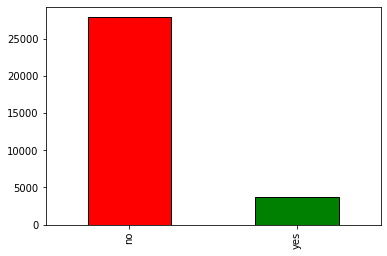

In [46]:
#ploting the bar graph of frequencies
train['subscribed'].value_counts().plot.bar(color =['red','green'],edgecolor='black')

### So only 11.73 % of the people have subscribed among 31647

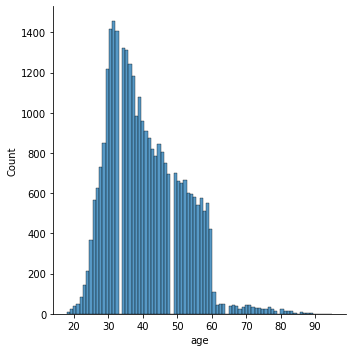

In [47]:
sns.displot(train["age"])

<AxesSubplot:>

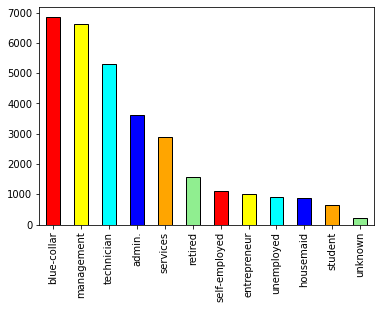

In [48]:
c = ['red', 'yellow', 'cyan', 'blue', 'orange','lightgreen']
train['job'].value_counts().plot.bar(color = c,edgecolor='black')

### We see that most of the clients belong to blue collar jobs

<AxesSubplot:>

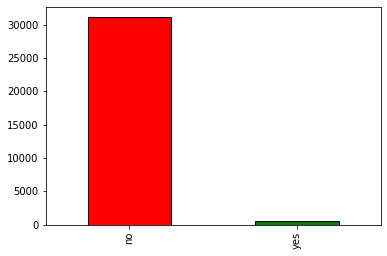

In [49]:
train['default'].value_counts().plot.bar(color = ['red','green'],edgecolor='black')

In [50]:
train['default'].value_counts(normalize=1)

no     0.981515
yes    0.018485
Name: default, dtype: float64

### Nearly 98% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots of continuous or numeric and crosstabs for categorical variables.....

# Bivariate Analysis

In [51]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

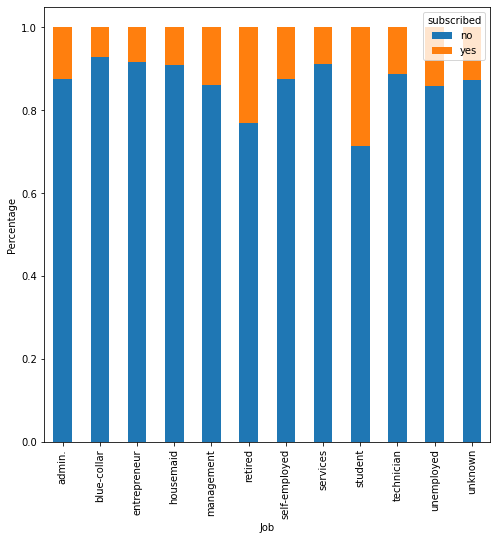

In [52]:
job = pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float),axis=0).plot(kind='bar',stacked =True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

### From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

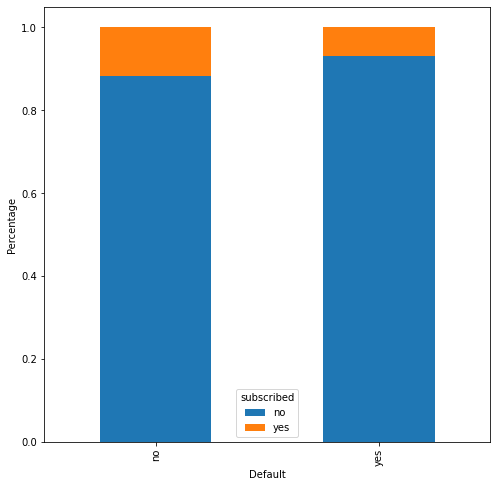

In [53]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Default')
plt.ylabel('Percentage')

### We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [54]:
# Converting our target variable into numeric values first
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

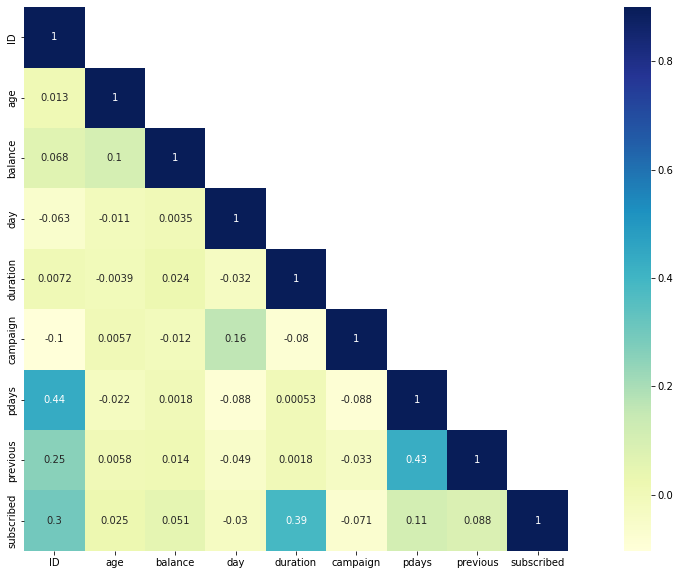

In [55]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

### So we can infer that duration is highly corelated to people subscribed  ....

In [56]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Model Buliding

In [57]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [58]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

### Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
#defining logistic regression model
lReg = LogisticRegression()

In [63]:
#fitting the model on x_train,ytrain
lReg.fit(x_train,y_train)

LogisticRegression()

In [64]:
# making prediction on the validation set
prediction =lReg.predict(x_val)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
#calculating the accuracy_score
accuracy_score(y_val,prediction)

0.8868878357030016

### So we got accuracy around 88.68% on the validation set.
### Lets try using Decision tree to check if we get a better accuracy

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [69]:
# fitting the decision tree model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [70]:
# making prediction on the validation set
predict = clf.predict(x_val)

In [71]:
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [72]:
accuracy_score(y_val,predict)

0.9042654028436019

### Here we got 90.42% accuracy which is a better result 

In [73]:
test = pd.get_dummies(test)

In [74]:
test_prediction =clf.predict(test)
test_prediction

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

### Finally we save these predictions into a csv file.

In [75]:
submission = pd.DataFrame()

In [76]:
submission['ID'] = test['ID']
submission['subscribed']=test_prediction

### Since the target variable is yes or no, we will convert the 1 and 0 in the predictions to yes and no respectively

In [77]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [78]:
submission.to_csv('Sub.csv',header=True,index=False)